In [1]:
import re
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Assignment import load_ml100k

In [51]:
interactions, items = load_ml100k("/data_dir")

loading the data
Successfully loaded MovieLens 100k data.


In [52]:
print('The length of the dataset ', len(interactions))
print(interactions.head(10))

The length of the dataset  100836
  user_id item_id  rating  timestamp
0       1       1     4.0  964982703
1       1       3     4.0  964981247
2       1       6     4.0  964982224
3       1      47     5.0  964983815
4       1      50     5.0  964982931
5       1      70     3.0  964982400
6       1     101     5.0  964980868
7       1     110     4.0  964982176
8       1     151     5.0  964984041
9       1     157     5.0  964984100


In [54]:
# The Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
# Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it. We won't be needing the timestamp column, so let's drop it to save on memory.
interactions['year'] = interactions['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
newInteractions = interactions.drop(['timestamp', 'user_id'], axis=1)
print(newInteractions.head(10))


  item_id  rating  year
0       1     4.0  2000
1       3     4.0  2000
2       6     4.0  2000
3      47     5.0  2000
4      50     5.0  2000
5      70     3.0  2000
6     101     5.0  2000
7     110     4.0  2000
8     151     5.0  2000
9     157     5.0  2000


In [55]:
#After we removed the timestamped
newInteractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   item_id  100836 non-null  object 
 1   rating   100836 non-null  float64
 2   year     100836 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


In [56]:
#After we removed the timestamped
print(newInteractions.describe())

              rating
count  100836.000000
mean        3.501557
std         1.042529
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000


/tmp/ipykernel_14002/764666471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=newInteractions, palette='viridis')


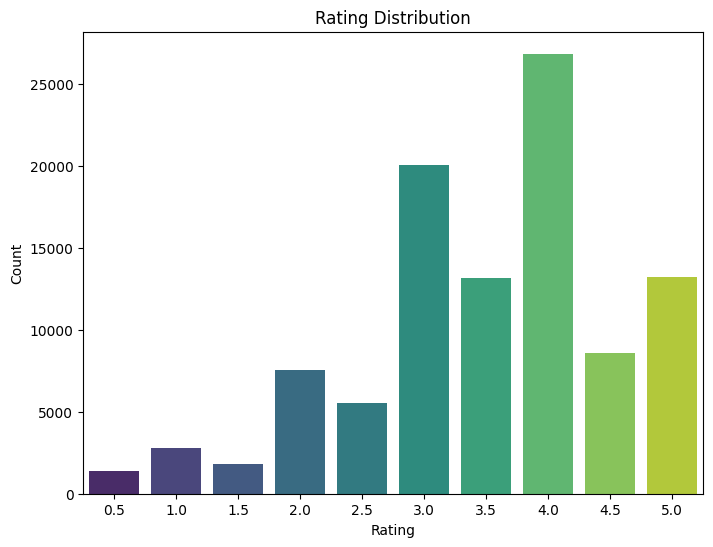

In [57]:
# Bar plot for rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=newInteractions, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

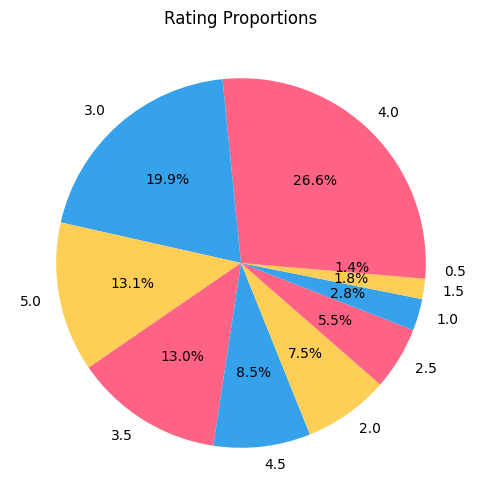

In [58]:
# Pie chart for rating proportions
rating_counts = newInteractions['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=['#FF6384', '#36A2EB', '#FFCE56'])
plt.title('Rating Proportions')
plt.show()

In [59]:
#### The item csv file
print('The length of the items file is ',len(items),'\n')
print(items.head(5))

The length of the items file is  9742 

  item_id                               title  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4            Waiting to Exhale (1995)   
4       5  Father of the Bride Part II (1995)   

                                          tags  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [60]:
items['title'] = items['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
print(items.head())

  item_id                        title  \
0       1                    Toy Story   
1       2                      Jumanji   
2       3             Grumpier Old Men   
3       4            Waiting to Exhale   
4       5  Father of the Bride Part II   

                                          tags  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [61]:
items['tags'] = items['tags'].str.replace(r'\s*\|', ',', regex=True)
print(items.head())

  item_id                        title  \
0       1                    Toy Story   
1       2                      Jumanji   
2       3             Grumpier Old Men   
3       4            Waiting to Exhale   
4       5  Father of the Bride Part II   

                                          tags  
0  Adventure,Animation,Children,Comedy,Fantasy  
1                   Adventure,Children,Fantasy  
2                               Comedy,Romance  
3                         Comedy,Drama,Romance  
4                                       Comedy  


In [72]:
## Now, I will merge both files together
dfData= items.merge(newInteractions, left_on='item_id', right_on='item_id', how='inner')
print(dfData.head(10))

  item_id      title                                         tags  rating  \
0       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     4.0   
1       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     4.0   
2       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     4.5   
3       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     2.5   
4       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     4.5   
5       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     3.5   
6       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     4.0   
7       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     3.5   
8       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     3.0   
9       1  Toy Story  Adventure,Animation,Children,Comedy,Fantasy     5.0   

   year  
0  2000  
1  1996  
2  2005  
3  2017  
4  2011  
5  2016  
6  2000  
7  2014  
8  2000  
9  1996  


In [69]:
# Compute the average rating for each movie
avg_ratings = dfData.groupby(['item_id', 'title', 'tags', 'year'], as_index=False)['rating'].mean()
avg_ratings.head(100)

item_id                                title  \
0        1                            Toy Story   
1        1                            Toy Story   
2        1                            Toy Story   
3        1                            Toy Story   
4        1                            Toy Story   
..     ...                                  ...   
95  100507                          21 and Over   
96  100527                           Safe Haven   
97  100553                        Frozen Planet   
98  100556                  Act of Killing, The   
99  100579  Universal Soldier: Day of Reckoning   

                                           tags  year    rating  
0   Adventure,Animation,Children,Comedy,Fantasy  1996  4.151515  
1   Adventure,Animation,Children,Comedy,Fantasy  1997  4.181818  
2   Adventure,Animation,Children,Comedy,Fantasy  1998  3.000000  
3   Adventure,Animation,Children,Comedy,Fantasy  1999  3.333333  
4   Adventure,Animation,Children,Comedy,Fantasy  2000  4.000000  
..                                          ...   ...       ...  
95                                       Comedy  2018  3.500000  
96                        Drama,Mystery,Romance  2015  4.000000  
97                                  Documentary  2015  4.500000  
98                                  Documentary  2016  5.000000  
99                       Action,Sci-Fi,Thriller  2017  4.000000  

[100 rows x 5 columns]

In [63]:
# Compute a list of distinct tags
# Flatten the list of tags
all_tags = []
for x in dfData['tags']:
    all_tags.extend(x.split(','))

# Use pd.Series to avoid the warning
all_tags = pd.unique(pd.Series(all_tags))

print(all_tags)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


In [77]:
# splits the genres column by taking the delimiter
split_genres = avg_ratings['tags'].str.split(',')
split_data = pd.DataFrame({'tags':split_genres.values}, index = split_genres.index)

split_data['rating'] = avg_ratings['rating']
split_data['title'] = avg_ratings['title']
split_data['year'] = avg_ratings['year']
split_data['item_id'] = avg_ratings['item_id']

split_data.head()

tags    rating      title  \
0  [Adventure, Animation, Children, Comedy, Fantasy]  4.151515  Toy Story   
1  [Adventure, Animation, Children, Comedy, Fantasy]  4.181818  Toy Story   
2  [Adventure, Animation, Children, Comedy, Fantasy]  3.000000  Toy Story   
3  [Adventure, Animation, Children, Comedy, Fantasy]  3.333333  Toy Story   
4  [Adventure, Animation, Children, Comedy, Fantasy]  4.000000  Toy Story   

   year item_id  
0  1996       1  
1  1997       1  
2  1998       1  
3  1999       1  
4  2000       1

In [90]:
objs = [split_data, pd.DataFrame(split_data['tags'].tolist())]
new_df = pd.concat(objs, axis=1).drop('tags', axis=1).sort_values('rating', ascending=False)
final_ratings = pd.melt(new_df, var_name='tag', value_name="tags", id_vars=['item_id','rating','title', 'year'], value_vars=[0,1,2,3,4,5,6,7,8]).sort_values('rating', ascending=False)
final_ratings = final_ratings[final_ratings.tags.notnull()].drop("tag", axis=1)
final_ratings.sort_values(by=['item_id'], inplace=True)
final_ratings.head()

item_id    rating      title  year       tags
17494        1  3.615385  Toy Story  2015  Adventure
92064        1  4.000000  Toy Story  2010   Children
133359       1  4.000000  Toy Story  2010     Comedy
48167        1  4.142857  Toy Story  2003  Animation
190758       1  3.166667  Toy Story  2004    Fantasy

In [80]:
# Total number of movies with a specific genre(tag) counted multiple times for multi genre(tag) movies
genre_count = final_ratings.groupby('tags').count()[['item_id']]
genre_count = genre_count.rename(columns = {'item_id': 'count'})
genre_count = genre_count.sort_values('count', ascending=False)

count = genre_count['count'].tolist()
genre = genre_count.index.tolist()
genre_count = pd.DataFrame({'tag': genre, 'count': count})
genre_count

tag  count
0                Drama  17976
1               Comedy  16612
2               Action   9970
3             Thriller   9719
4              Romance   7548
5            Adventure   7456
6                Crime   5865
7               Sci-Fi   5427
8              Fantasy   4148
9               Horror   3580
10            Children   3540
11             Mystery   2910
12           Animation   2614
13                 War   1771
14             Musical   1738
15                IMAX    936
16         Documentary    884
17             Western    781
18           Film-Noir    413
19  (no genres listed)     40

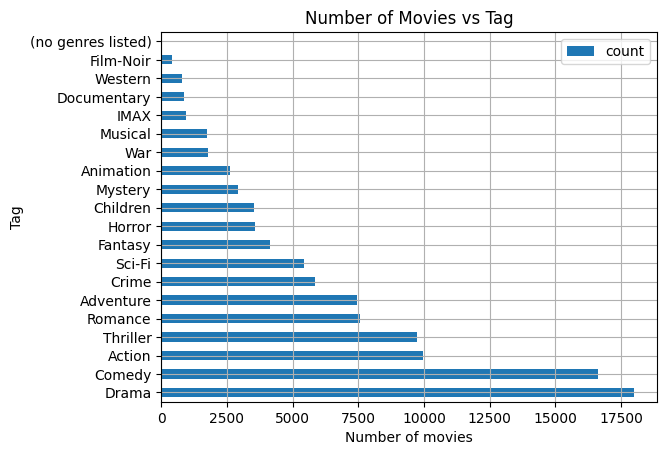

In [103]:
# Plot total number of movies vs genre
genre_count.plot.barh(x = 'tag', y = 'count')
plt.xlabel('Number of movies')
plt.ylabel('Tag')
plt.title('Number of Movies vs Tag')
plt.grid(True)
plt.savefig('data_dir/NumberofMoviesvsTag.jpeg')
plt.show()

In [104]:
avg_genre_ratings = final_ratings.groupby(['tags'], as_index=False)['rating'].mean()
avg_genre_ratings = avg_genre_ratings.sort_values(by=['rating'], ascending=False)
avg_genre_ratings

tags    rating
10           Film-Noir  3.878974
7          Documentary  3.787839
18                 War  3.669678
8                Drama  3.543507
19             Western  3.533945
3            Animation  3.516137
6                Crime  3.497520
14             Mystery  3.497231
13             Musical  3.469359
12                IMAX  3.429994
15             Romance  3.398688
0   (no genres listed)  3.360000
2            Adventure  3.347323
17            Thriller  3.341091
9              Fantasy  3.336785
16              Sci-Fi  3.279511
1               Action  3.277440
5               Comedy  3.250335
4             Children  3.207343
11              Horror  3.098742

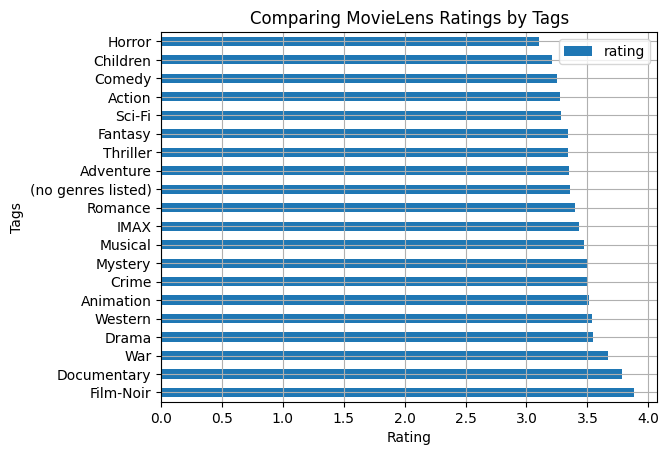

In [105]:
avg_genre_ratings.plot.barh(x = 'tags', y='rating')
plt.xlabel('Rating')
plt.ylabel('Tags')
plt.title('Comparing MovieLens Ratings by Tags')
plt.grid(True)
plt.savefig('data_dir/MovieLensRatingsbyTags.jpeg')
plt.show()

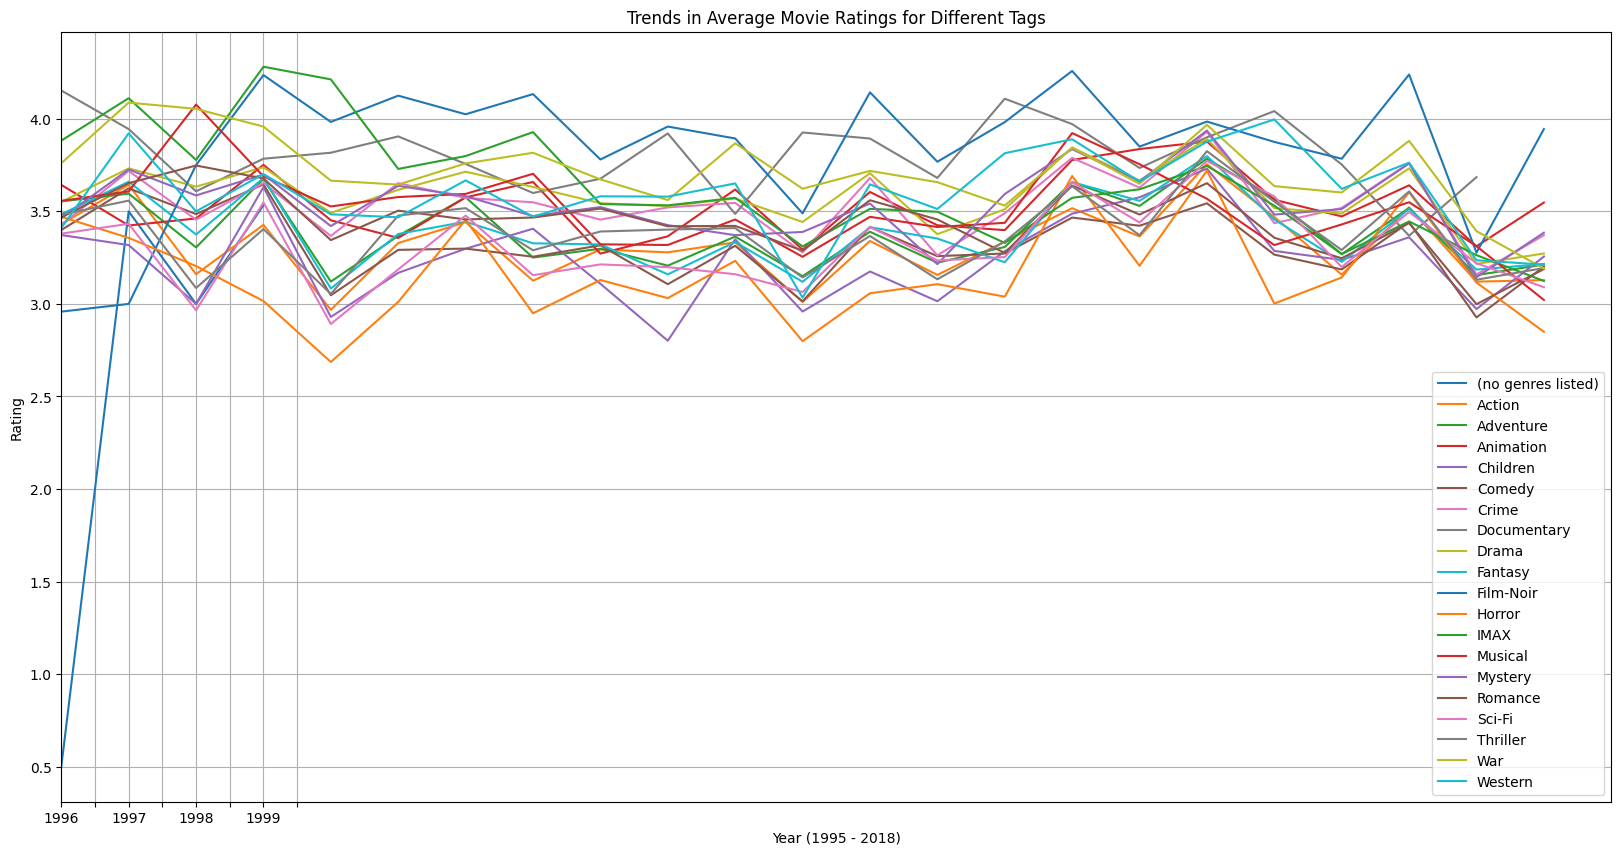

In [106]:
rating_acrossYears = final_ratings.groupby(['tags', 'year'], as_index=False)['rating'].mean()

fig, ax = plt.subplots(figsize=(20, 10))
for genre, year in rating_acrossYears.groupby('tags'):
    year.plot(x='year', y='rating', ax=ax, label=genre)

plt.xlabel('Year (1995 - 2018)')
plt.xlim(0, 23)
plt.ylabel('Rating')
plt.title('Trends in Average Movie Ratings for Different Tags')
plt.grid(True)
plt.savefig('data_dir/AverageMovieRatingsforDifferentTags.jpeg')
plt.show()

In [107]:
# Assuming your DataFrame is named 'df'
# with columns 'user_id', 'item_id', 'rating', 'title', 'year', 'genre'

# Convert 'rating' column to a numeric type if it isn't already
final_ratings['rating'] = pd.to_numeric(final_ratings['rating'], errors='coerce')

# Get summary statistics for the ratings
print("Descriptive Statistics for Ratings:")
print(final_ratings['rating'].describe())

Descriptive Statistics for Ratings:
count    103928.000000
mean          3.377370
std           0.917281
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64



Average Rating by Year:
year
1996    3.479457
1997    3.636554
1998    3.371551
1999    3.628768
2000    3.200252
2001    3.424583
2002    3.511251
2003    3.393244
2004    3.397499
2005    3.324153
2006    3.426549
2007    3.181807
2008    3.483572
2009    3.284299
2010    3.356899
2011    3.683763
2012    3.518385
2013    3.772006
2014    3.461719
2015    3.318832
2016    3.574067
2017    3.127777
2018    3.220454
Name: rating, dtype: float64


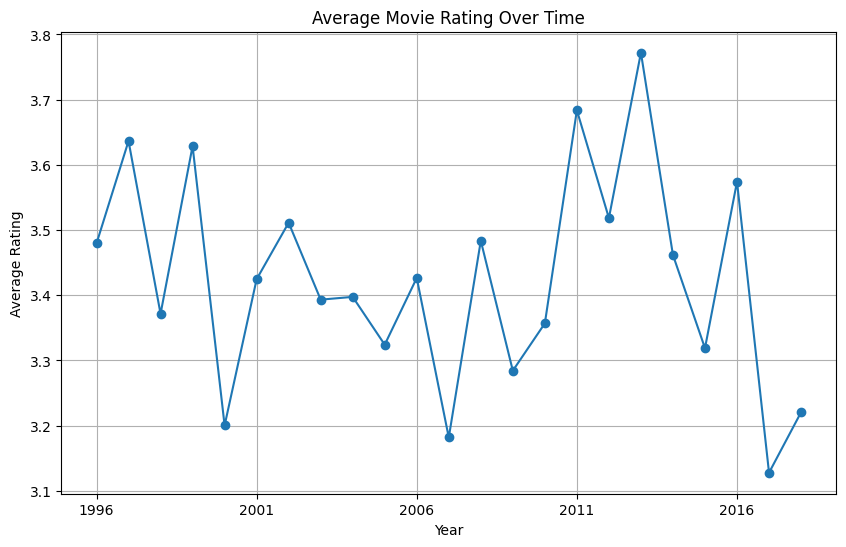

In [108]:
# Calculate the average rating per year
average_rating_by_year = final_ratings.groupby('year')['rating'].mean()

print("\nAverage Rating by Year:")
print(average_rating_by_year)

# You can also visualize this data using a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_rating_by_year.plot(kind='line', marker='o')
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

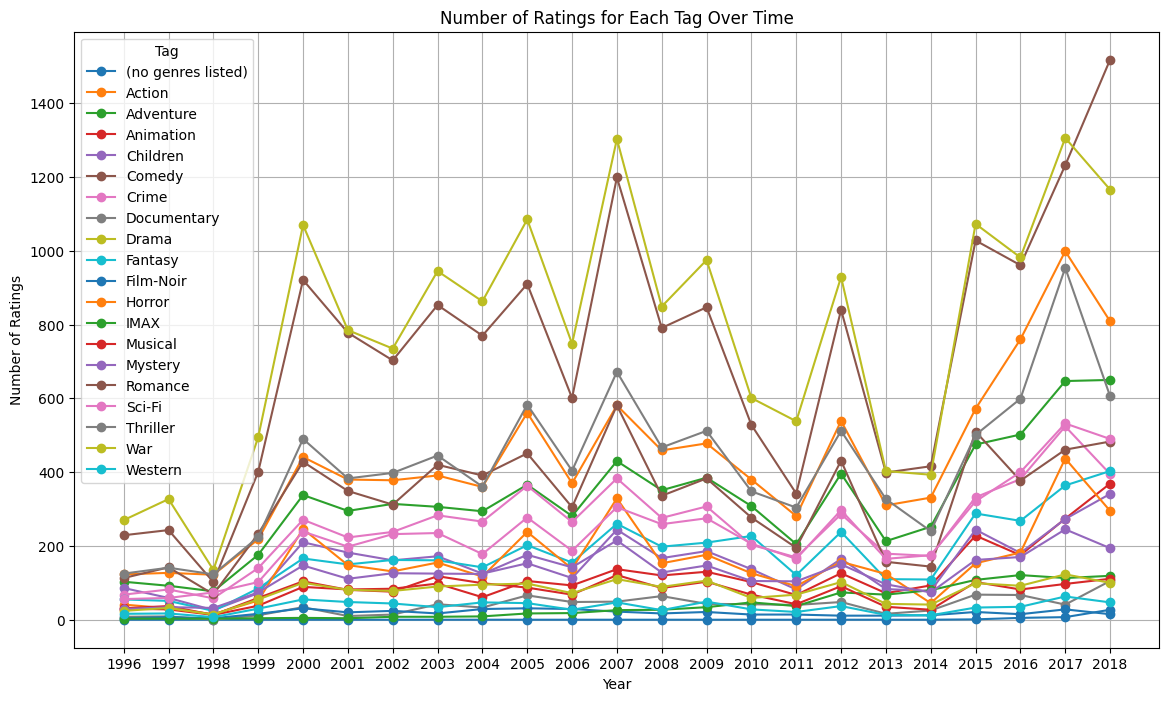

In [110]:
'''Temporal Analysis of tag Popularity
This code groups the data by year and tag to count the number of ratings, then creates a line plot to visualize how the popularity of each tag has changed over time.'''

# and has the necessary columns: 'year', 'tag'

# Group by year and tag to count the number of ratings
tag_popularity_over_time = final_ratings.groupby(['year', 'tags']).size().unstack(fill_value=0)

# Create a line plot to visualize tag popularity trends
plt.figure(figsize=(14, 8))
for tag in tag_popularity_over_time.columns:
    plt.plot(tag_popularity_over_time.index, tag_popularity_over_time[tag], marker='o', label=tag)
plt.title('Number of Ratings for Each Tag Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.legend(title='Tag')
plt.grid(True)
plt.savefig('data_dir/NumberofRatingsforEachTagOverTime.jpeg')
plt.show()